<a href="https://colab.research.google.com/github/mooochiiii/exercise/blob/main/pandas_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Câu 1: Xác định các thư viện cần dùng cho quá trình phân tích thống kê mô tả và đưa vào mã lệnh
(sử dụng Google Colab)**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns

**Câu 2: Sử dụng tập dữ liệu Aircraft Wildlife Strikes, 1990-2015 để tiến hành phân tích thống kê
mô tả.**

In [3]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/MyDrive/notebook/database.csv")

Mounted at /content/drive


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (9,12,15,17) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
#hiển thị 5 dòng đầu của dữ liệu 
df.head()

,Record ID,Incident Year,Incident Month,Incident Day,Operator ID,Operator,Aircraft,Aircraft Type,Aircraft Make,Aircraft Model,...,Fuselage Strike,Fuselage Damage,Landing Gear Strike,Landing Gear Damage,Tail Strike,Tail Damage,Lights Strike,Lights Damage,Other Strike,Other Damage
0,127128,1990,1,1,DAL,DELTA AIR LINES,B-757-200,A,148,26,...,0,0,0,0,1,1,0,0,0,0
1,129779,1990,1,1,HAL,HAWAIIAN AIR,DC-9,A,583,90,...,0,0,0,0,0,0,0,0,1,0
2,129780,1990,1,2,UNK,UNKNOWN,UNKNOWN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
3,2258,1990,1,3,MIL,MILITARY,A-10A,A,345,NaN,...,0,0,0,0,0,0,0,0,0,0
4,2257,1990,1,3,MIL,MILITARY,F-16,A,561,NaN,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# một vài thông tin cả dữ liệu 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174104 entries, 0 to 174103
Data columns (total 66 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Record ID             174104 non-null  int64  
 1   Incident Year         174104 non-null  int64  
 2   Incident Month        174104 non-null  int64  
 3   Incident Day          174104 non-null  int64  
 4   Operator ID           174104 non-null  object 
 5   Operator              174104 non-null  object 
 6   Aircraft              174104 non-null  object 
 7   Aircraft Type         133074 non-null  object 
 8   Aircraft Make         131051 non-null  object 
 9   Aircraft Model        122439 non-null  object 
 10  Aircraft Mass         127320 non-null  float64
 11  Engine Make           123434 non-null  float64
 12  Engine Model          121988 non-null  object 
 13  Engines               127342 non-null  float64
 14  Engine Type           127282 non-null  object 
 15  

**Câu 3: Đối với các cột dữ liệu định lượng, hãy áp dụng các phép tính hướng tâm, phép tính phương
sai – độ lệch chuẩn, các phép tính phân vị, cực đại – cực tiểu để tính các thông số cơ bản của các
cột dữ liệu định lượng này.**

In [6]:
df_dl = pd.DataFrame(columns = ['Aircraft Mass','Engine Make','Engines','Engine2 Position','Engine4 Position','Height', 'Speed', 'Distance', 'Fatalities', 'Injuries'], data = df)
df_dl.describe()

,Aircraft Mass,Engine Make,Engines,Engine2 Position,Engine4 Position,Height,Speed,Distance,Fatalities,Injuries
count,127320.000000,123434.000000,127342.000000,118715.000000,3092.000000,103677.000000,71258.000000,99713.000000,565.000000,229.000000
mean,3.510611,21.306958,2.057656,2.918570,2.058538,831.032283,141.925622,0.703738,0.046018,1.746725
std,0.873783,11.023161,0.469374,2.008204,1.441000,1803.650833,46.905651,3.464467,0.435164,6.571239
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3.000000,10.000000,2.000000,1.000000,1.000000,0.000000,120.000000,0.000000,0.000000,1.000000
50%,4.000000,22.000000,2.000000,1.000000,1.000000,50.000000,138.000000,0.000000,0.000000,1.000000
75%,4.000000,34.000000,2.000000,5.000000,4.000000,800.000000,160.000000,0.000000,0.000000,1.000000
max,5.000000,92.000000,4.000000,7.000000,5.000000,31300.000000,2500.000000,150.000000,8.000000,100.000000


**kết luận:** có tất cả 5 cột giá trị định lượng là Height, Speed, Distance, Fatalities, Injuries

*Câu 4: Hãy vẽ biểu đồ boxplot cho từng cột dữ liệu định lượng và xác định xem có xuất hienj các
ngoại lệ không?nếu có thì ở cột nào?*

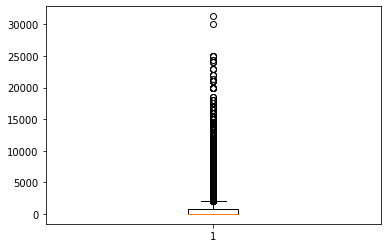

In [7]:
#Height
Height = df["Height"].dropna()
plt.boxplot(Height);

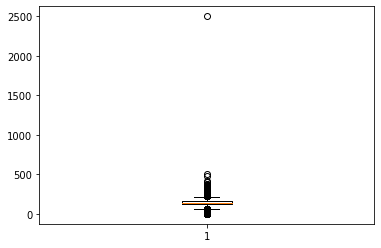

In [8]:
#Speed
Speed = df["Speed"].dropna()
plt.boxplot(Speed);

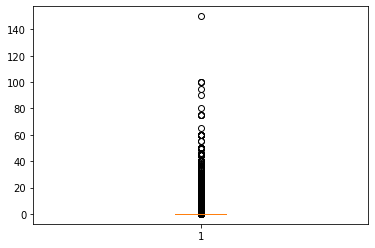

In [9]:
#Distance
Distance = df["Distance"].dropna()
plt.boxplot(Distance);

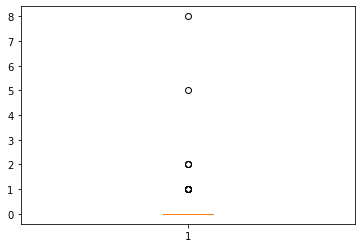

In [10]:
#Fatalities
Fatalities = df["Fatalities"].dropna()
plt.boxplot(Fatalities);

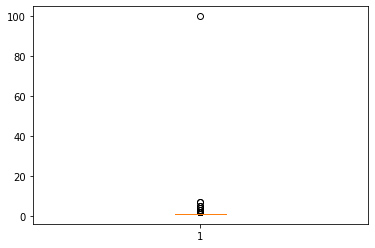

In [11]:
#Injuries
Injuries = df["Injuries"].dropna()
plt.boxplot(Injuries);

**kết luận :** tất cả đều có giá trị ngoại lệ

**Câu 5: Người ta thường sử dụng chỉ số z (hay z-score) để xác định giá trị ngoại lệ (outlier). Bạn
hãy loại bỏ các hàng có chứa giá trị ngoại lệ ra khỏi dataframe.**

In [12]:
#thay thế các giá trị không xác định bằng giá trị trung bình 
for i in ['Injuries', 'Fatalities', 'Distance', 'Speed', 'Height']:
  mean = df[i].mean()
  df[i] = df[i].fillna(mean)

#xoá bỏ các giá trị ngoại lệ 
df_2=  df[['Injuries', 'Fatalities', 'Distance', 'Speed', 'Height']]
abs_z_scores = np.abs(st.zscore(df_2))
df_2 = df_2[(abs_z_scores < 3).all(axis=1)]

**Câu 6: Thực hiện lại câu 3 – 4 với tập dữ liệu sau khi đã loại bỏ ngoại lệ.**

In [13]:
# câu 3
df_2.describe()

,Injuries,Fatalities,Distance,Speed,Height
count,165324.000000,165324.000000,165324.000000,165324.000000,165324.000000
mean,1.746789,0.045864,0.409041,139.243468,622.578372
std,0.004036,0.002657,0.748831,21.036409,708.816405
min,1.746725,0.000000,0.000000,52.000000,0.000000
25%,1.746725,0.046018,0.000000,140.000000,0.000000
50%,1.746725,0.046018,0.000000,141.925622,831.032283
75%,1.746725,0.046018,0.703738,141.925622,831.032283
max,2.000000,0.046018,8.500000,230.000000,5000.000000


**vẽ biểu đồ boxplot**

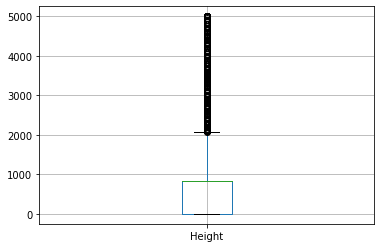

In [14]:
#height
df_2.boxplot(['Height']);

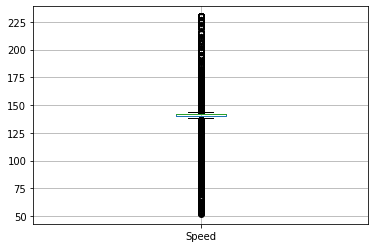

In [15]:
#speed
df_2.boxplot(['Speed']);

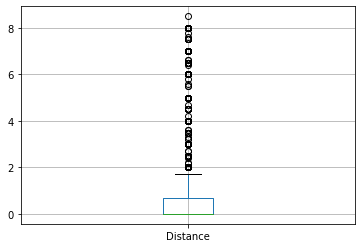

In [16]:
#distance
df_2.boxplot(['Distance']);

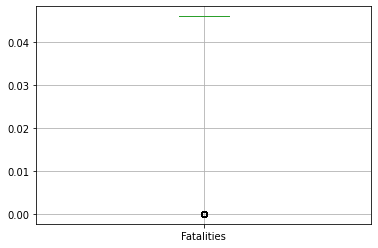

In [17]:
#Fatalities
df_2.boxplot(['Fatalities']);

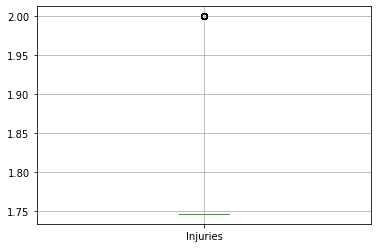

In [18]:
#injuries 
df_2.boxplot(['Injuries']);

**Câu 7: Hãy tính độ tương quan (correlation) giữa các cột định lượng. (Hay xây dựng correlation matrix)**

In [19]:
correlation = df_2.corr(method = "pearson")
correlation

,Injuries,Fatalities,Distance,Speed,Height
Injuries,1.000000,0.000923,0.005935,-0.016695,0.001294
Fatalities,0.000923,1.000000,-0.003502,-0.007386,-0.001060
Distance,0.005935,-0.003502,1.000000,0.214414,0.382980
Speed,-0.016695,-0.007386,0.214414,1.000000,0.470107
Height,0.001294,-0.001060,0.382980,0.470107,1.000000


**Câu 8: Từ correlation matrix, Hãy vẽ:**
- Heat map (biểu đồ nhiệt)
- Pair plot (biểu đồ cặp)


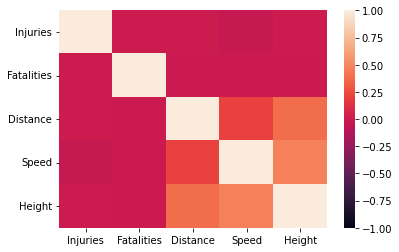

In [27]:
#biểu đồ nhiệt 
sns.heatmap(correlation, vmin=-1, vmax=1);

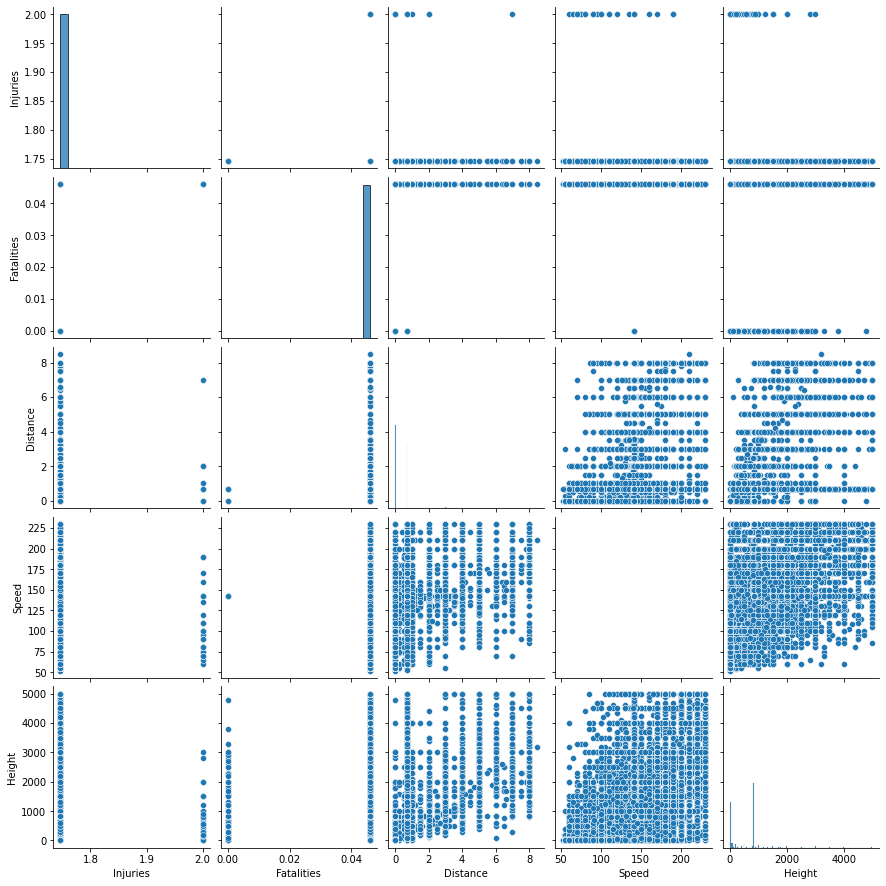

In [22]:
#biểu đồ cặp
sns.pairplot(df_2)

**Câu 9: Đối với các cột dữ liệu định tính, hãy:**
- Vẽ biểu đồ cột dạng đứng
- Vẽ biểu đồ cột dạng ngang
- Vẽ biểu đồ đường tròn
- Vẽ biểu đồ Pareto

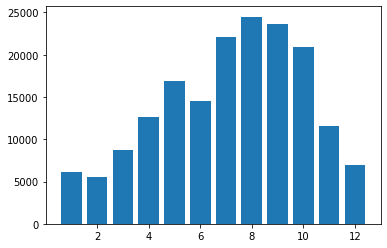

In [30]:
#biểu đồ cột dạng đứng 
x = dict(df["Incident Month"].value_counts()).keys()
y = dict(df["Incident Month"].value_counts()).values()
plt.bar(x,y);

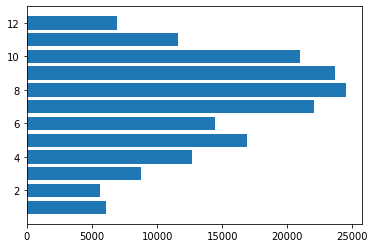

In [31]:
#biểu đồ cột dạng ngang 
x = dict(df["Incident Month"].value_counts()).keys()
y = dict(df["Incident Month"].value_counts()).values()
plt.barh(list(x),list(y));